   ## Machine learning Algorithms

In this module I am going to introduce some machi8ne learning algorithms which are very useful to evaluation and prediction.

Machine learning consists of 3 different type:
   - supervised learning
   - unsupervised learning
   - reinforcement learning
   
   I will cover first 2 part here. 

### 1- Supervised Learning

In supervised learning there is a label for each feature in cars dataset. we have price acording to each row of fetures so we call it supervised learning.
like Regreson and classification.



There is some machine learning algorithms for supervised learning that i try to cover them here.


I use sklearn library to implement them here.

### KNN
KNN algorithm is one of the simplest classification algorithm and it is one of the most used learning algorithms. So what is the KNN algorithm? I’m glad you asked! KNN is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.
In this algorithm training phase is pretty fast also there is low generalization it shows that knn keeps all training data.
Knn is based on feature similarity .

It can use for both classification and regressions.

In [4]:
import pandas as pd
import numpy as np

# Import clean data 
path = "cars.csv"
df = pd.read_csv(path)

In [14]:
X = df[['engine-size']]
y = df['price']
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

Yhat = neigh.predict(X)
Yhat[0:5]

array([16500., 13860.,  7975., 15250., 15250.])

### SVM

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.



In [19]:
from sklearn import svm

X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X, Y) 




dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6

clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

In above we create a multi class classification algorithm using SVM

### Random forests

Random Forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because it’s simplicity and the fact that it can be used for both classification and regression tasks. In this post, you are going to learn, how the random forest algorithm works and several other important things about it.

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

Another great quality of the random forest algorithm is that it is very easy to measure the relative importance of each feature on the prediction. Sklearn provides a great tool for this, that measures a features importance by looking at how much the tree nodes, which use that feature, reduce impurity across all trees in the forest. It computes this score automatically for each feature after training and scales the results, so that the sum of all importance is equal to 1.

#### Disadvantages of using Random Forest


   A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.
    Due to their complexity, they require much more time to train than other comparable algorithms.

Throughout the rest of this article we will see how Python's Scikit-Learn library can be used to implement the random forest algorithm to solve regression, as well as classification, problems. 

In [23]:
X = df[['engine-size']]
y = np.array(df['price'])

### splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

###  Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

## Training

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  


### Evaluation

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  




Mean Absolute Error: 1750.407856575716
Mean Squared Error: 6359640.467573339
Root Mean Squared Error: 2521.832759636003


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


### 2- Unsupervised Learning

In unsupervised learning we dont have label for each feature actually, we just put them in different group according to some features 
like clustering.


the objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

A cluster refers to a collection of data points aggregated together because of certain similarities.

You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Let’s see the steps on how the K-means machine learning algorithm works using the Python programming language.

We’ll use the Scikit-learn library and some random data to illustrate a K-means clustering simple explanation.

In [24]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

%matplotlib inline

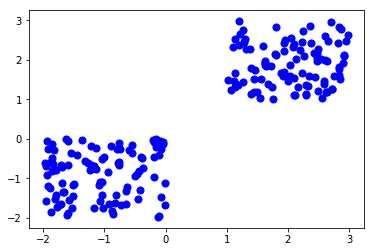

In [40]:
X= -2 * np.random.rand(200,4)

X1 = 1 + 2 * np.random.rand(100,4)

X[100:200, :] = X1

plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')

plt.show()

In [41]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=4)

Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
#  Finding the centroid
Kmean.cluster_centers_

array([[-1.22244229, -1.07442906, -1.25259309, -0.77268772],
       [ 1.92465797,  2.02621242,  1.96676677,  1.51610275],
       [ 2.20819138,  1.7131113 ,  1.9732834 ,  2.45817265],
       [-0.82851792, -0.60771586, -0.64144505, -1.51108625]])

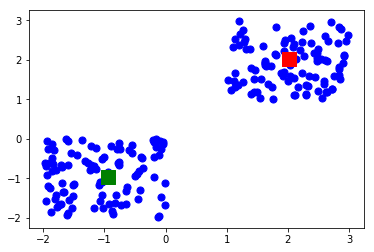

In [43]:
# display the cluster centroids

plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')

plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')

plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')

plt.show()

In [44]:
## Testing
Kmean.labels_

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0,
       3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3,
       0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 2], dtype=int32)

As you can see above, 50 data points belong to the 0 cluster while the rest belong to the 1 cluster.

we covered evaluation using spervised and unsupervised learning for classification(single and multi class),
regression as well as clustering now you can clean your data and visualize them also you can use this algorithms to evaluate your models.
GOOD LUCK.
